In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [2]:
def linear_function(x):
  return 3*x - 1/2


In [3]:
np.random.seed(2)
#generate 100 samples
n = 100
X = np.random.randn(n)
Y = np.array([linear_function(x) for x in X])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(len(X_train), len(X_test))

80 20


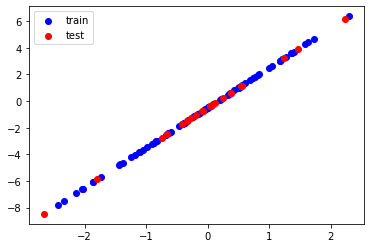

In [4]:
def plot(x, y, color, label, marker = 'o'):
  plt.scatter(x, y, color=color, label=label, marker=marker)
  plt.legend()

plot(X_train, Y_train, 'b', 'train')
plot(X_test, Y_test, 'r', 'test')

In [5]:
# def NeuralNetwork(num_hidden_layer, units_per_hidden_laye):
#   if(num_hidden_layer != len(units_per_hidden_laye)):
#     return 
#   model = tf.keras.Sequential()
#   model.add(tf.keras.Input([1], name = 'input'))
#   for i in range(num_hidden_layer):
#     model.add(tf.keras.layers.Dense(units_per_hidden_laye[i], name = 'hidden_layer_' + str(i+1)))
#   model.add(tf.keras.layers.Dense(1, name='output'))

#   return model

In [6]:
model = tf.keras.Sequential()
model.add(tf.keras.Input([1], name = 'input'))  
model.add(tf.keras.layers.Dense(1, name='output'))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
output (Dense)               (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.fit(X_train, Y_train, epochs=1500, verbose=1)

Epoch 1/1500
3/3 [==============================] - 1s 4ms/step - loss: 2.6837
Epoch 2/1500
3/3 [==============================] - 0s 3ms/step - loss: 2.9909
Epoch 3/1500
3/3 [==============================] - 0s 3ms/step - loss: 2.9717
Epoch 4/1500
3/3 [==============================] - 0s 3ms/step - loss: 2.8941
Epoch 5/1500
3/3 [==============================] - 0s 2ms/step - loss: 2.8343
Epoch 6/1500
3/3 [==============================] - 0s 2ms/step - loss: 2.6931
Epoch 7/1500
3/3 [==============================] - 0s 2ms/step - loss: 2.7985
Epoch 8/1500
3/3 [==============================] - 0s 2ms/step - loss: 2.6531
Epoch 9/1500
3/3 [==============================] - 0s 4ms/step - loss: 2.5129
Epoch 10/1500
3/3 [==============================] - 0s 2ms/step - loss: 2.6021
Epoch 11/1500
3/3 [==============================] - 0s 3ms/step - loss: 2.6034
Epoch 12/1500
3/3 [==============================] - 0s 3ms/step - loss: 2.4797
Epoch 13/1500
3/3 [==============================

In [8]:
prediction = model.evaluate(X_test, Y_test)
print('test loss: ', prediction)

1/1 [==============================] - 0s 101ms/step - loss: 3.1039e-09
test loss:  3.10389514091014e-09


In [9]:
a = -148
pred = model.predict([a])
print('GT', linear_function(a))
print('Prediction', float(pred))


GT -444.5
Prediction -444.4920959472656


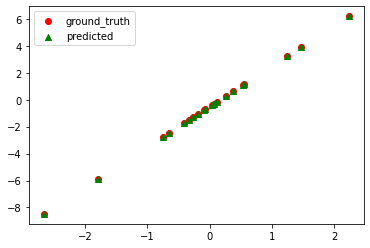

In [10]:
outs =[]
for x in X_test:
  outs.append(float(model.predict([x])))

plot(X_test, Y_test, 'r', 'ground_truth')
plot(X_test, outs, 'g', 'predicted', marker = '^')

In [11]:
weight = np.float(model.weights[0])
bias = np.float(model.weights[1])

print(weight, bias)

2.9999465942382812 -0.5000100135803223


In [ ]:
f(x) = 2.9963589*x - 0.5005806